In [2]:
zip_path = '/content/drive/My\ Drive/BCML/datasets/DeepLearning/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [3]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization

In [5]:
dataset_dir = '/content/'
train_datagen = ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True,zoom_range=0.1,shear_range=0.1)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(200,200,3), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

opt=RMSprop(lr=0.0001)

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       7

In [8]:
history=model.fit(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 185s 2s/step - loss: 0.6873 - accuracy: 0.5360 - val_loss: 0.6598 - val_accuracy: 0.5764
Epoch 2/75
100/100 [==============================] - 181s 2s/step - loss: 0.6341 - accuracy: 0.6349 - val_loss: 0.5689 - val_accuracy: 0.6998
Epoch 3/75
100/100 [==============================] - 182s 2s/step - loss: 0.5871 - accuracy: 0.6911 - val_loss: 0.5514 - val_accuracy: 0.7225
Epoch 4/75
100/100 [==============================] - 182s 2s/step - loss: 0.5634 - accuracy: 0.7129 - val_loss: 0.5291 - val_accuracy: 0.7180
Epoch 5/75
100/100 [==============================] - 182s 2s/step - loss: 0.5391 - accuracy: 0.7328 - val_loss: 0.5123 - val_accuracy: 0.7385
Epoch 6/75
100/100 [==============================] - 183s 2s/step - loss: 0.5234 - accuracy: 0.7385 - val_loss: 0.5012 - val_accuracy: 0.7611
Epoch 7/75
100/100 [==============================] - 181s 2s/step - loss: 0.5097 - accuracy: 0.7558 - val_loss: 0.4702 - val_accuracy: 0.7784

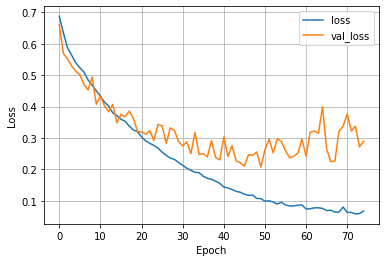

In [9]:
plot_loss(history)

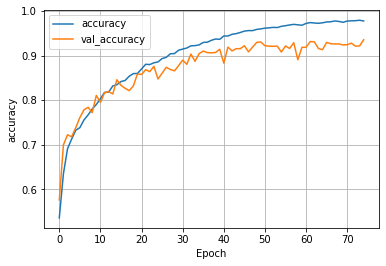

In [10]:
plot_accuracy(history)

# **Kesimpulan**

Epoch 50/75

100/100 [==============================] - 183s 2s/step - loss: 0.1076 - accuracy: 0.9601 - val_loss: 0.2073 - val_accuracy: 0.9307

dari hasil terbaik yang saya dapat dengan melihat val_loss terkecil berada di angka 0.20 dengan akurasi di 93%